In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
tau = 0.9

Van der Waals equation
$$
PV^3\,-(Pb + RT)V^2\,+aV\,-ab\! = 0
$$

Rewright paramenters ${\phi} = \frac{V}{V_c},{\pi} = \frac{P}{P_c},{\tau} = \frac{T}{T_c} $, reduced equation of state will be:

$$
({\pi} + \frac{3}{{\phi}^2})({\phi}-\frac{1}{3}) = \frac{8}{3}{\tau}
$$

$$
{\pi} =  \frac{\frac{8}{3}{\tau}}{{\phi}-\frac{1}{3}} - \frac{3}{{\phi}^2}
$$

In [174]:
def van_der_waals(phi):
    """VdW gas presure as a function of reduced volume."""
    return ((8/3)*tau)/(phi-(1/3))-(3/(phi**2))

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


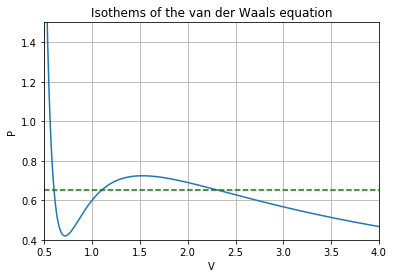

In [187]:
phi = np.linspace(0.5, 5, 1000)
pi = van_der_waals(phi)
plt.plot(phi, pi)

pi1 = 0.65 #изобара, точки пересечения с которой необходимо найти, чтобы, проинтегрировав, получить площади над и под ней и сравнить (правило Маквелла)
plt.plot([0.5, 5],[pi1, pi1], 'k--', c = 'g')

plt.xlabel('V')
plt.ylabel('P')
plt.axis([0.5, 4, 0.4, 1.5])

plt.legend()
plt.title('Isothems of the van der Waals equation')
plt.grid()

Чтобы найти точки пересечения изохоры с изобарой необходимо решить полиномиальное приведенное уравнение состояния, с ${\pi}$ = 0.65 
$$
{\pi}{\phi} - \frac{\pi}{3} + \frac{3}{{\phi}} - \frac{1}{\phi^2} = \frac{8}{3\tau}
$$
Домножим на ${\phi^2}$
$$
{\pi}{\phi^3} - \frac{1}{3}{\phi^2}({\pi + 8\tau}) + 3\phi - 1 = 0
$$

In [188]:
van_der_waals_pl = [pi1, - (1/3)*(pi1 + 8*tau), + 3, -1] #Коэффициенты при phi
phi = np.roots(van_der_waals_pl)
phi.sort()
print(phi)
V = phi

[ 0.60286812  1.09743234  2.32534056]


[ 0.60286812  1.09743234  2.32534056]


D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


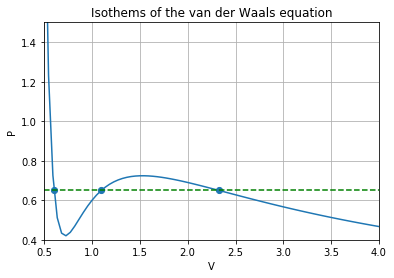

In [189]:
phi = np.linspace(0.5, 5, 100)
pi = van_der_waals(phi)
plt.plot(phi, pi)

pi1 = 0.65 #изобара, точки пересечения с которой необходимо найти, чтобы, проинтегрировав, получить площади над и под ней и сравнить (правило Маквелла)
plt.plot([0.5, 5],[pi1, pi1], 'k--', c = 'g')

plt.xlabel('V')
plt.ylabel('P')
plt.axis([0.5, 4, 0.4, 1.5])

plt.legend()
plt.title('Isothems of the van der Waals equation')
plt.grid()
print(V)
plt.scatter(V, van_der_waals(V) , label = 'intersection', marker = '.', s=150)


In [210]:
"""
area1 - площадь, образованная изотермой и изобарой между [0] и [1] 
чтобы найти ее, находится площадь под изобарой на данном интервале из которой вычитается площадь под изотермой

area2 - площадь, образованная изотермой и изобарой между [1] и [2] 
чтобы найти ее, находится площадь под изотермой на данном интервале из которой вычитается площадь под изобарой

"""
area1, l1= (V[1] - V[0]) * pi1 - integrate.quad(van_der_waals,  V[0], V[1])
area2, l1 = integrate.quad(van_der_waals, V[1], V[2]) - (V[2] - V[1])* pi1

print (area1, area2)
print(l1, l2)

0.063225945606 0.0580212098122
-0.798140339268 -0.794430011193


In [191]:
def areas(pi1):
    tau = 0.9
    van_der_waals_pl = [pi1, - (1/3)*(pi1 + 8*tau), + 3, -1] #coeffs phi
    phi = np.roots(van_der_waals_pl)
    phi.sort()
    
    area1, l1= (V[1] - V[0]) * pi1 - integrate.quad(van_der_waals,  V[0], V[1])
    area2, l2 = integrate.quad(van_der_waals, V[1], V[2]) - (V[2] - V[1])* pi1
    
    return area1 - area2

In [192]:
pi_equav = optimize.fsolve(areas, 0.65) #Find the roots of a function Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate.
print (pi_equav)

[ 0.64697833]


In [193]:
tau = 0.9
van_der_waals_pl = [pi_equav, - (1/3)*(pi_equav + 8*tau), + 3, -1]
v = np.roots(van_der_waals_pl)
v.sort()

area1, l1 = (V[1] - V[0]) * pi_equav - integrate.quad(van_der_waals,  V[0], V[1])
area2, l2 = integrate.quad(van_der_waals, V[1], V[2]) - (V[2] - V[1]) * pi_equav

print (area1, area2)

0.0617315378864 0.0617315378864


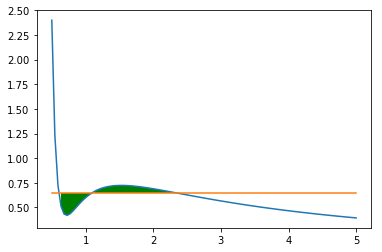

In [223]:
fig = plt.gcf()
ax = fig.add_subplot(111)

ax.plot(phi,pi)

between_line = np.ones(phi.size) * pi_equav

ax.plot(phi, hline)
ax.fill_between(phi, between_line, pi, where=(phi >= V[0]) & (phi <= V[1]), facecolor='g')
ax.fill_between(phi, between_line, pi, where=(phi >= V[1]) & (phi <= V[2]), facecolor='g')